downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.0217 - loss: 4.1118 - val_accuracy: 0.0250 - val_loss: 3.8311
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0303 - loss: 3.7233 - val_accuracy: 0.0250 - val_loss: 3.7240
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0259 - loss: 3.6801 - val_accuracy: 0.0250 - val_loss: 3.6773
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0579 - loss: 3.6368 - val_accuracy: 0.0500 - val_loss: 3.6645
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0290 - loss: 3.6255 - val_accuracy: 0.0250 - val_loss: 3.6492
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0641 - loss: 3.5672 - val_accuracy: 0.0333 - val_loss: 3.6611
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0621 - loss: 3.5450 - val_accuracy: 0.0417 - val_loss: 3.6273
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0631 - loss: 3.5196 - val_accuracy: 0.0250 - val_loss: 3.6739


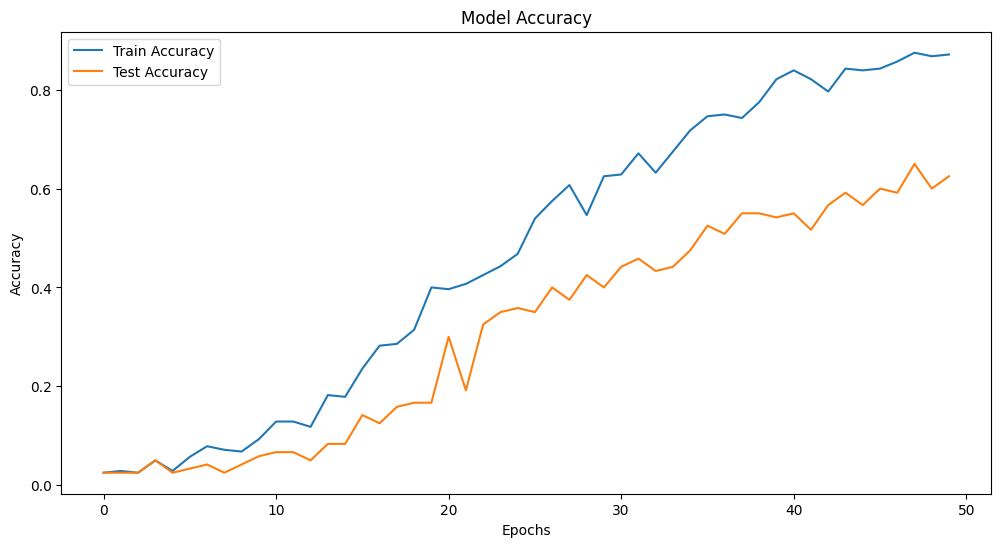

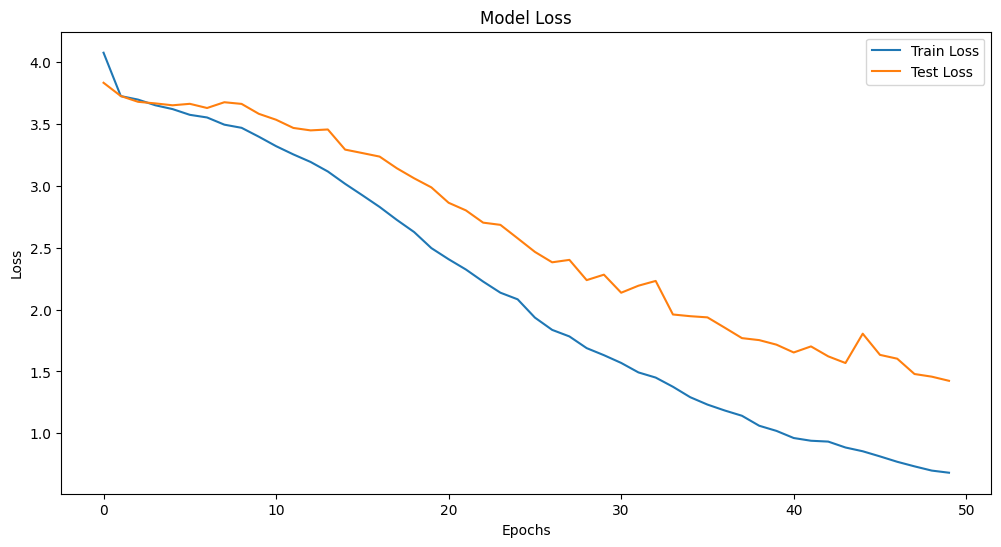

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


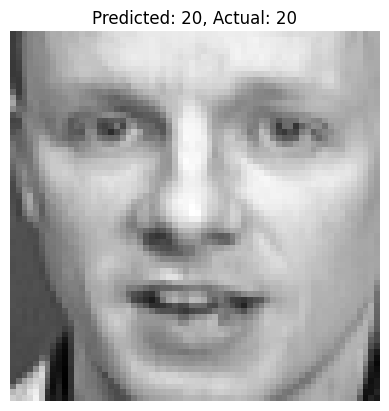

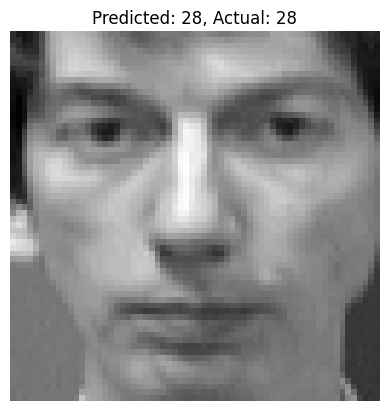

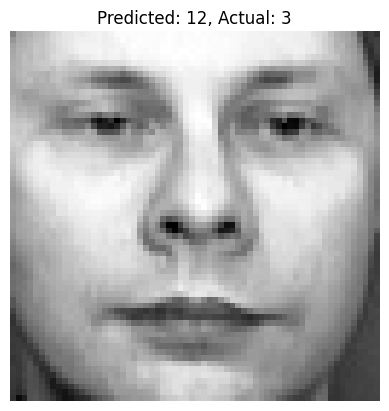

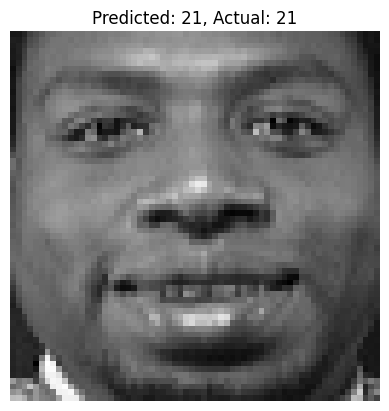

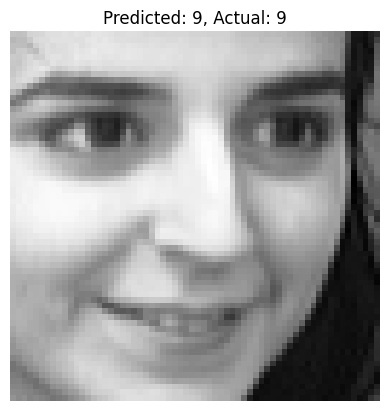

In [1]:
# Step 1: Import necessary libraries
import tensorflow as tf
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the Olivetti Faces Dataset
faces = fetch_olivetti_faces()
X = faces.data  # Flattened images (64x64 = 4096 features)
y = faces.target  # Labels (person ID)

# Step 3: One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')  # Output layer with 40 classes (people)
])

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 9: Visualize the training process

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 10: Make Predictions on the Test Set

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Display the first 5 test samples with their predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}")
    plt.axis('off')
    plt.show()
